# CS613 - Natural Language Processing - Assignment 1

## This is the Notebook submitted by S Deepak Narayanan, 16110142 for Assignment 1 of CS613, Natural Language Processing

In [4]:
from nltk.tokenize import RegexpTokenizer
import time
file = open('/home/deepak/Jupyter-Notebook/NLP/Assignment 1/shakesphere.txt','r')
sentence = ''
for i in file:
    sentence+=i
file.close()
type_1 = {}
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(sentence)
for i in tokens:
    if i not in type_1 and i.isalpha():
        type_1[i] = 1

number_of_types = len(type_1.keys())
type_to_token_ratio = number_of_types/len(tokens)
print(" The TTR, Types, and number of tokens are respectively",type_to_token_ratio, number_of_types, len(tokens))


 The TTR, Types, and number of tokens are respectively 0.03147635284821214 29198 927617


As we can see from above, the above program essentially returns a list of all the tokens it had found. We are also computing the type to token ratio, a useful metric that would give us details about the uniqueness of the text. It is in simple terms the ratio of number of unique works to total number of words.
Initially there was an error relating to puntk, which was fixed by using nltk.download(). 
There is a stackoverflow link that relates to the issue that people might face when using NLTK.

This is the link : https://stackoverflow.com/questions/35861482/nltk-lookup-error/35862172

Text(0,0.5,'Frequency')

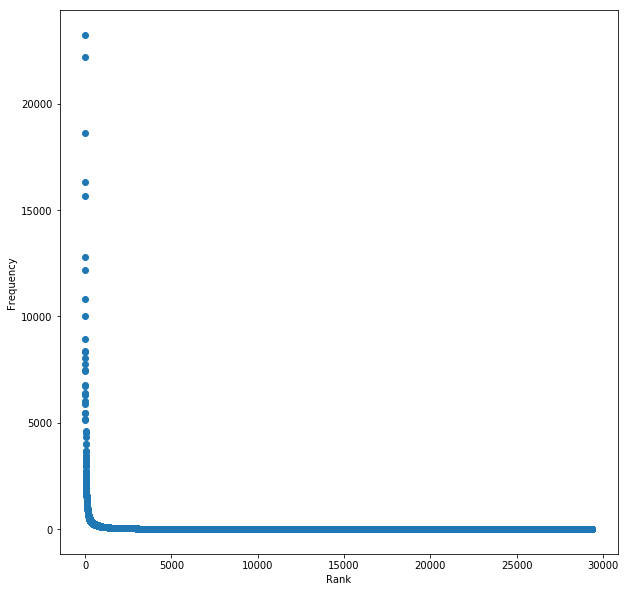

In [6]:
# Implementing Zipf's law
# Law for the fact that frequency of occurrence of a work is inversely proportional to its rank in the corpus

import matplotlib.pyplot as plt
freq_table = {}
for i in tokens:
    if i in freq_table:
        freq_table[i]+=1
    else:
        freq_table[i]=1
        
list1 = [(i, freq_table[i]) for i in freq_table]
from operator import itemgetter
list1 = sorted(list1, key = itemgetter(1))

rank = []
for i in range(len(list1)):
        rank.append(list1[len(list1)-i-1])

x_axis = []
y_axis = []

count = 0
for i in rank:
    count+=1
    x_axis.append(count)
    y_axis.append(i[1])

plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis)
plt.xlabel('Rank')
plt.ylabel('Frequency')

## As can be seen from the figure above Zipf's law that frequency is inversely proportional to rank holds here, in this case clearly.

Text(0,0.5,'Number of words')

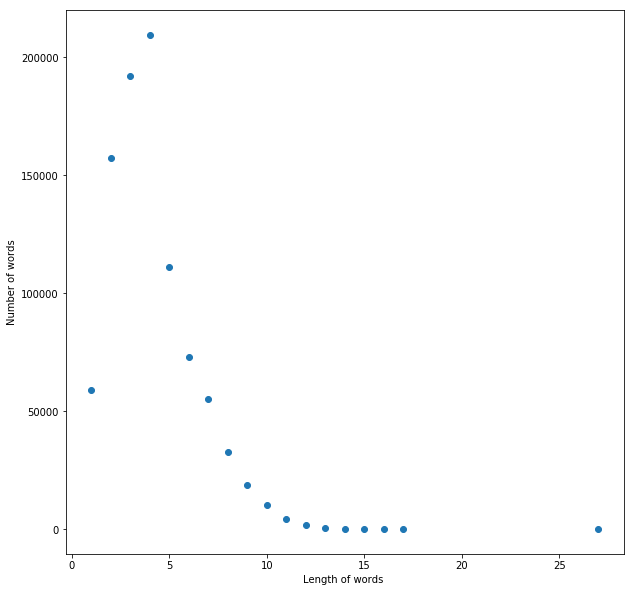

In [8]:
# This is for the length of the words....
import matplotlib.pyplot as plt
import numpy
import pylab

word_count = {}
for i in tokens:
    if i.isalpha():
        if len(i) in word_count:
            word_count[len(i)]+=1
        else:
            word_count[len(i)]=1
plt.figure(figsize=(10,10))
x = [x for x in word_count.keys()]
y = [y for y in word_count.values()]
plt.scatter([x for x in word_count.keys()], [y for y in word_count.values()])
plt.xlabel('Length of words ')
plt.ylabel('Number of words')

## The above plot is similar to the expected inverse relation for Zipf's other law.

## Zipf's law in general is true for words that are not occurring a lot of times in the text, that is they are not very common.

## Zipf's law doesn't hold for words that occur way too commonly in the text like "the", "for" etc.. These words anyways make up the majority of the text.

Text(0,0.5,'Frequency')

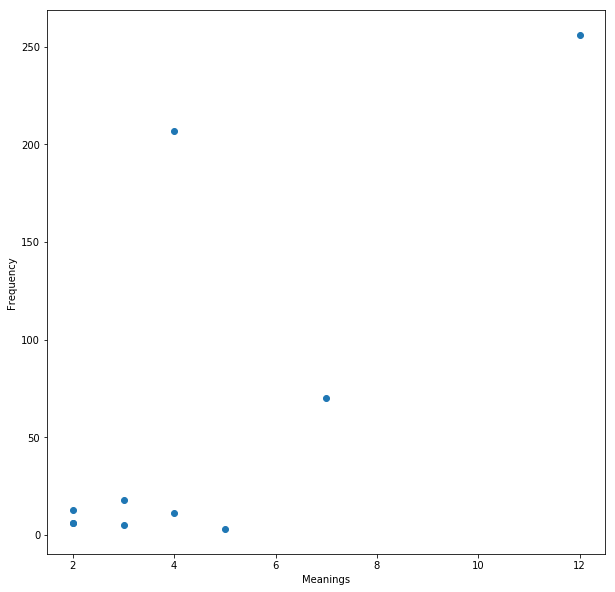

In [9]:
# Zipf's Law for Meanings

dict_words = {'abundance':2, 'gaudy':2, 'light':12, 'riper':5, 'contracted':4, 'self':4, 'ornament':3, 'substantial':3, 'decease':2, 'bright':7}
dict_sort = sorted(dict_words, key = dict_words.get, reverse=True)
meanings_freq=[]
meanings_count = []
for i in dict_sort:
    meanings_count.append(dict_words[i])
    meanings_freq.append(freq_table[i])

plt.figure(figsize=(10,10))
plt.scatter(meanings_count, meanings_freq)
plt.xlabel('Meanings')
plt.ylabel('Frequency')

In [10]:
# Heap's Law Implementation
vocabulary = {}
vocb = []
num_tok = []
count = 0
for i in tokens:
    count+=1
    if i not in vocabulary:
        vocabulary[i] = 1
    vocb.append((len(list(vocabulary.keys())),count))

Text(0,0.5,'Vocabulary size')

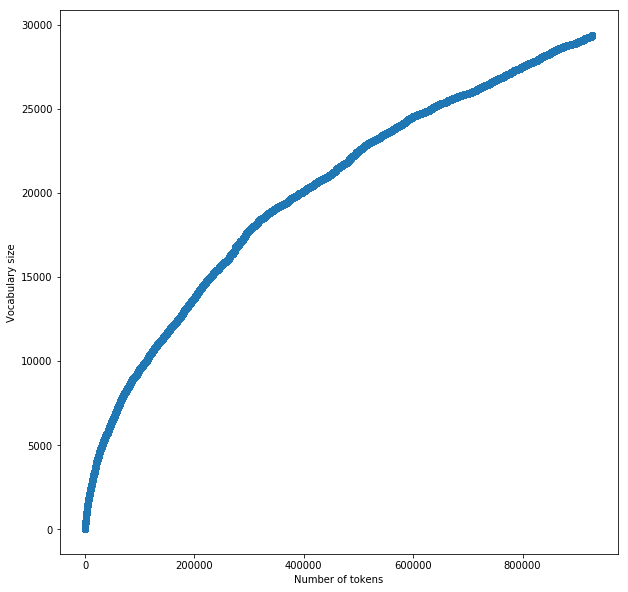

In [12]:
plt.figure(figsize=(10,10))
x_1 = [i[0] for i in vocb]
y_1 = [i[1] for i in vocb]
plt.scatter(y_1,x_1)
plt.xlabel('Number of tokens')
plt.ylabel('Vocabulary size')

 The estimated values for the paramters, k, and beta (b) are 33.8873412871 0.493683017145


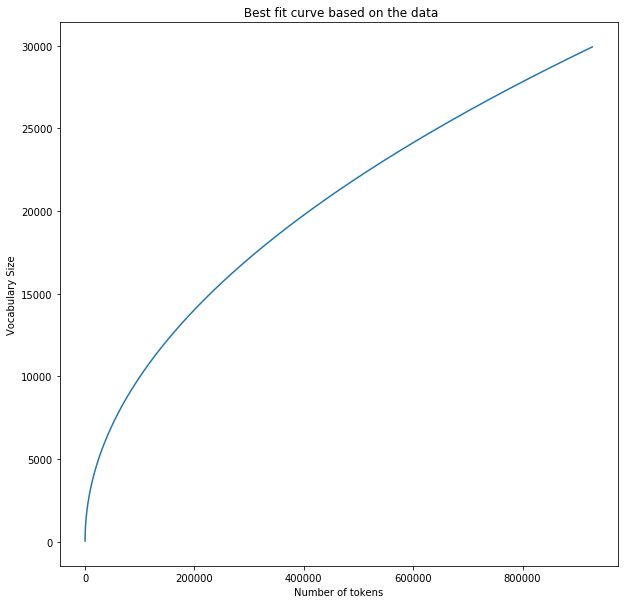

In [14]:
import numpy
from scipy.optimize import curve_fit
def func(n, k, b):
    return k * (n**b)
plt.figure(figsize=(10,10))
popt, pcov = curve_fit(func, y_1, x_1)
plt.plot(y_1, func(y_1, popt[0], popt[1]))
plt.title(' Best fit curve based on the data')
plt.xlabel('Number of tokens')
plt.ylabel('Vocabulary Size')
print(" The estimated values for the paramters, k, and beta (b) are", popt[0], popt[1])